In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as  sns 
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report

In [2]:
btc_train=pd.read_csv("BTC-USD Training Data - 1st Jan 2016 to 1st Jan 2022.csv") 
btc_train

,Date,Open,High,Low,Close,adjclose,Volume
0,01-01-2016,430.721008,436.246002,427.515015,434.334015,434.334015,3.627890e+07
1,02-01-2016,434.622009,436.062012,431.869995,433.437988,433.437988,3.009660e+07
2,03-01-2016,433.578003,433.743011,424.705994,430.010986,430.010986,3.963380e+07
3,04-01-2016,430.061005,434.516998,429.084015,433.091003,433.091003,3.847750e+07
4,05-01-2016,433.069000,434.182007,429.675995,431.959991,431.959991,3.452260e+07
...,...,...,...,...,...,...,...
2188,28-12-2021,50679.859380,50679.859380,47414.210940,47588.855470,47588.855470,3.343038e+10
2189,29-12-2021,47623.871090,48119.742190,46201.496090,46444.710940,46444.710940,3.004923e+10
2190,30-12-2021,46490.605470,47879.964840,46060.312500,47178.125000,47178.125000,2.668649e+10
2191,31-12-2021,47169.371090,48472.527340,45819.953130,46306.445310,46306.445310,3.697417e+10


In [3]:
btc_train.set_index("Date",inplace=True)
btc_train

,Open,High,Low,Close,adjclose,Volume
Date,,,,,,
01-01-2016,430.721008,436.246002,427.515015,434.334015,434.334015,3.627890e+07
02-01-2016,434.622009,436.062012,431.869995,433.437988,433.437988,3.009660e+07
03-01-2016,433.578003,433.743011,424.705994,430.010986,430.010986,3.963380e+07
04-01-2016,430.061005,434.516998,429.084015,433.091003,433.091003,3.847750e+07
05-01-2016,433.069000,434.182007,429.675995,431.959991,431.959991,3.452260e+07
...,...,...,...,...,...,...
28-12-2021,50679.859380,50679.859380,47414.210940,47588.855470,47588.855470,3.343038e+10
29-12-2021,47623.871090,48119.742190,46201.496090,46444.710940,46444.710940,3.004923e+10
30-12-2021,46490.605470,47879.964840,46060.312500,47178.125000,47178.125000,2.668649e+10


In [4]:
btc_train.columns

Index(['Open', 'High', 'Low', 'Close', 'adjclose', 'Volume'], dtype='object')

In [5]:
btc_train.isnull().sum() 

Open        0
High        0
Low         0
Close       0
adjclose    0
Volume      0
dtype: int64

In [6]:
btc_train.info()
print("Desc=",btc_train.describe)

<class 'pandas.core.frame.DataFrame'>
Index: 2193 entries, 01-01-2016 to 01-01-2022
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Open      2193 non-null   float64
 1   High      2193 non-null   float64
 2   Low       2193 non-null   float64
 3   Close     2193 non-null   float64
 4   adjclose  2193 non-null   float64
 5   Volume    2193 non-null   float64
dtypes: float64(6)
memory usage: 119.9+ KB
Desc= <bound method NDFrame.describe of                     Open          High           Low         Close  \
Date                                                                 
01-01-2016    430.721008    436.246002    427.515015    434.334015   
02-01-2016    434.622009    436.062012    431.869995    433.437988   
03-01-2016    433.578003    433.743011    424.705994    430.010986   
04-01-2016    430.061005    434.516998    429.084015    433.091003   
05-01-2016    433.069000    434.182007    429.675995    431.959991   

Text(0.5, 1.0, 'opening price history')

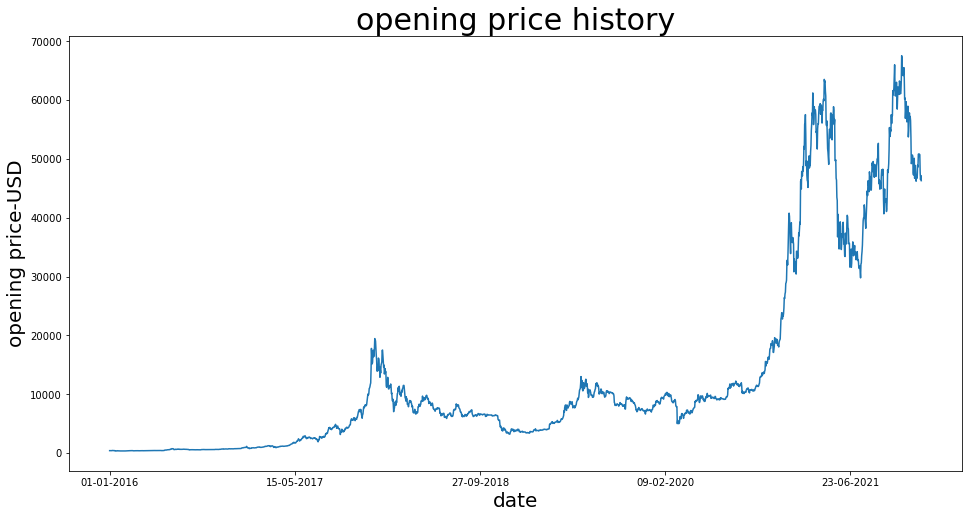

In [7]:
btc_train['Open'].plot(figsize=(16,8))
plt.xlabel("date",fontsize=20)
plt.ylabel("opening price-USD",fontsize=20)
plt.title("opening price history",fontsize=30)   

Text(0.5, 1.0, 'closing price history')

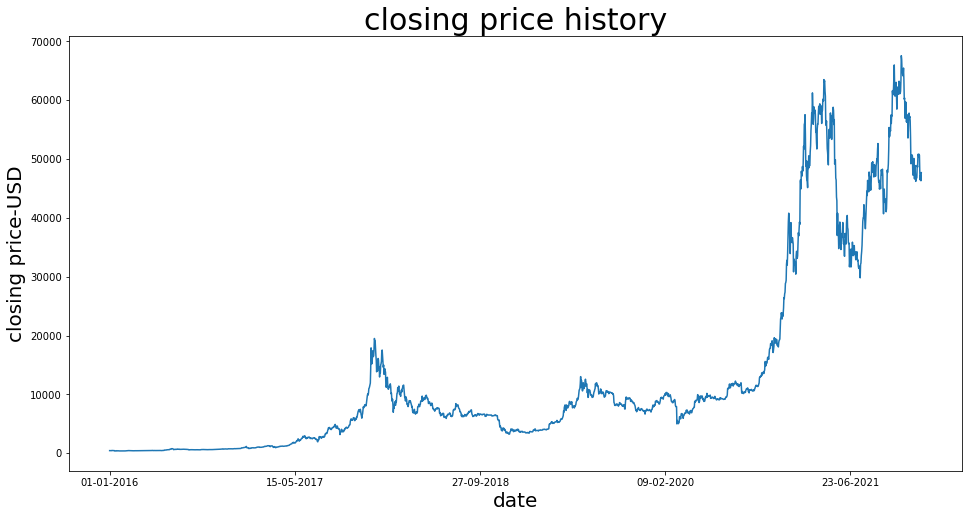

In [8]:
btc_train['Close'].plot(figsize=(16,8))
plt.xlabel("date",fontsize=20)
plt.ylabel("closing price-USD",fontsize=20)
plt.title("closing price history",fontsize=30)   

In [10]:
btc_test=pd.read_csv("BTC-USD Out of Time Testing 1st Jan 2022 to 4th Feb 2022.csv")
btc_test.set_index("Date",inplace=True) 
btc_test

,Open,High,Low,Close,adjclose,Volume
Date,,,,,,
01-01-2022,46311.74609,47827.31250,46288.48438,47686.81250,47686.81250,24582667004
02-01-2022,47680.92578,47881.40625,46856.93750,47345.21875,47345.21875,27951569547
03-01-2022,47343.54297,47510.72656,45835.96484,46458.11719,46458.11719,33071628362
04-01-2022,46458.85156,47406.54688,45752.46484,45897.57422,45897.57422,42494677905
05-01-2022,45899.35938,46929.04688,42798.22266,43569.00391,43569.00391,36851084859
06-01-2022,43565.51172,43748.71875,42645.53906,43160.92969,43160.92969,30208048289
07-01-2022,43153.57031,43153.57031,41077.44531,41557.90234,41557.90234,84196607520
08-01-2022,41561.46484,42228.94141,40672.27734,41733.94141,41733.94141,28066355845
09-01-2022,41734.72656,42663.94922,41338.16016,41911.60156,41911.60156,21294384372


In [11]:
btc_test.isnull().sum()

Open        0
High        0
Low         0
Close       0
adjclose    0
Volume      0
dtype: int64

In [12]:
def norm_func(i):
    x = (i-i.min())/(i.max()-i.min())
    return (x)

In [13]:
norm_train = norm_func(btc_train)
norm_train


,Open,High,Low,Close,adjclose,Volume
Date,,,,,,
01-01-2016,0.000977,0.000896,0.001100,0.001042,0.001042,0.000022
02-01-2016,0.001035,0.000893,0.001166,0.001028,0.001028,0.000005
03-01-2016,0.001020,0.000859,0.001057,0.000977,0.000977,0.000032
04-01-2016,0.000967,0.000871,0.001123,0.001023,0.001023,0.000028
05-01-2016,0.001012,0.000866,0.001132,0.001006,0.001006,0.000017
...,...,...,...,...,...,...
28-12-2021,0.748903,0.735294,0.712726,0.702720,0.702720,0.095178
29-12-2021,0.703416,0.697874,0.694360,0.685694,0.685694,0.085544
30-12-2021,0.686549,0.694369,0.692221,0.696608,0.696608,0.075962


In [14]:
x_train=norm_train.iloc[:,[1,2,3,4,5]]
y_train=norm_train.iloc[:,0]

In [ ]:
norm_test=norm_func(btc_test)
norm_test 

In [16]:
x_test=norm_test.iloc[:,[1,2,3,4,5]]
y_test=norm_test.iloc[:,0]

# MODEL

In [20]:
import tensorflow.compat.v2 as tv
import tensorflow as tf
from tensorflow import keras 

In [21]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import regularizers
seed = 7
np.random.seed(seed)
model = Sequential()
model.add(Dense(8, input_dim=5, activation='relu'))
model.add(Dense(5,  activation='relu'))
model.add(Dense(1,  activation='relu')) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mse']) 
history=model.fit(x_train, y_train, validation_split=0.20, epochs=50, batch_size=10,verbose=1) 
scores = model.evaluate(x_train, y_train)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100)) 

Epoch 1/50
176/176 [==============================] - 2s 4ms/step - loss: 0.2664 - mse: 0.0021 - val_loss: 1.0377 - val_mse: 0.2074
Epoch 2/50
176/176 [==============================] - 0s 2ms/step - loss: 0.2533 - mse: 9.7943e-04 - val_loss: 0.8173 - val_mse: 0.1195
Epoch 3/50
176/176 [==============================] - 0s 2ms/step - loss: 0.2480 - mse: 4.6900e-04 - val_loss: 0.6622 - val_mse: 0.0456
Epoch 4/50
176/176 [==============================] - 1s 3ms/step - loss: 0.2459 - mse: 2.5819e-04 - val_loss: 0.6240 - val_mse: 0.0236
Epoch 5/50
176/176 [==============================] - 1s 3ms/step - loss: 0.2456 - mse: 2.1322e-04 - val_loss: 0.6133 - val_mse: 0.0186
Epoch 6/50
176/176 [==============================] - 1s 3ms/step - loss: 0.2454 - mse: 1.7774e-04 - val_loss: 0.6068 - val_mse: 0.0156
Epoch 7/50
176/176 [==============================] - 0s 2ms/step - loss: 0.2453 - mse: 1.4431e-04 - val_loss: 0.5949 - val_mse: 0.0139
Epoch 8/50
176/176 [==============================] 

In [22]:
scores = model.evaluate(x_test, y_test)
print(model.metrics_names[1], scores[1]*100)

2/2 [==============================] - 0s 3ms/step - loss: 0.5296 - mse: 0.0046
mse 0.45985011383891106


# FUTURE PREDICTIONS

In [25]:
predict=model.predict(x_test) 
predict

array([[0.9012969 ],
       [0.9019712 ],
       [0.8630435 ],
       [0.8612936 ],
       [0.71908826],
       [0.61540604],
       [0.5503924 ],
       [0.5023746 ],
       [0.5160118 ],
       [0.5057288 ],
       [0.5654785 ],
       [0.6604597 ],
       [0.6317851 ],
       [0.5884796 ],
       [0.5920558 ],
       [0.58276665],
       [0.5438266 ],
       [0.53225976],
       [0.507369  ],
       [0.47372365],
       [0.24232861],
       [0.03080054],
       [0.05671391],
       [0.12437557],
       [0.12416896],
       [0.17283311],
       [0.12095468],
       [0.18028037],
       [0.21917084],
       [0.19722751],
       [0.23782296],
       [0.2667545 ],
       [0.17669114],
       [0.12116218],
       [0.18026936]], dtype=float32)